In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import time

# For animation
from IPython.display import display, clear_output


# import required libraries for CNN (may contain repeats)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Reshape

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Gradient descent exploration

Suppose we need to find solution to the regression (find some parameters for it). It can be computationaly expensive, so instead we define loss function and try to minimize loss function (loss function takes in same parameters as input). We can do it iteratively, jus by sampling values for it and randomly stumbling around (sample random value for each aparmeter and try try try). Or, if we know our loss function and can find derivatives for it with respect to the parameters, we can find the direction parrameters should be changed to minimize loss function

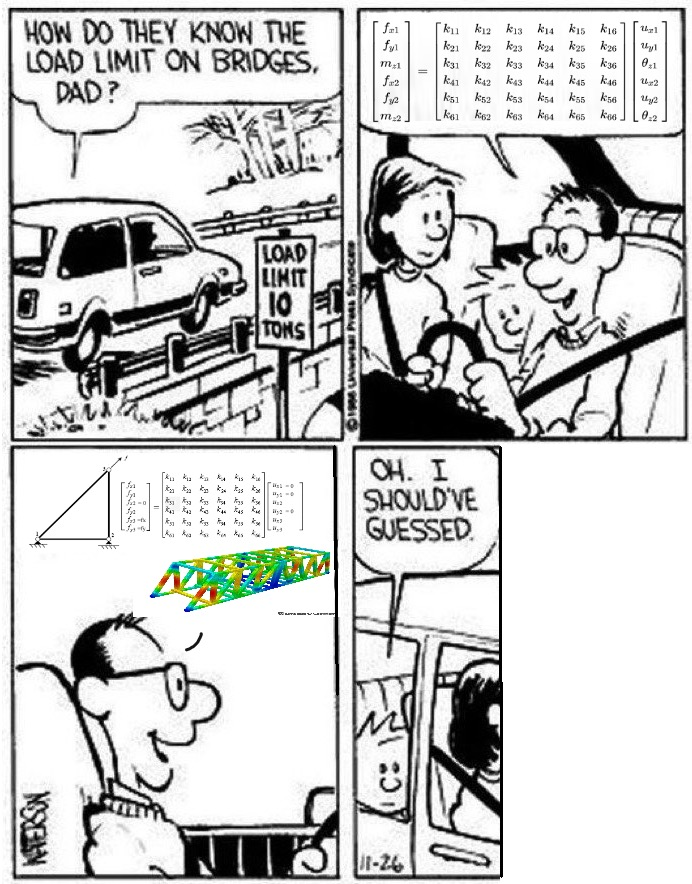

### Vanilla Gradient Descent

In [83]:
def gradient_descent_meta(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-2):
    """gradient_descent(data_x, data_y, iterations=1000, learning_rate=0.05) -> slope, intercept, mc, loss
    linear regression by using the gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []

    start = time.time()
    
    loss_c = tol + 1

    while loss_c > tol:
        # Compute the current error
        y = data_x * m + c      # predicted value
        error =  data_y - y     # vector of differences between predicted and actual
        loss_c = np.sum(error**2)/N
        loss.append (loss_c)
        
        # Compute the gradient using vectorized operations
        # minus cuz opposite of gradient NOOOOOOOOO!
        dm = -2/N * np.dot(error, data_x)
        dc = -2/N * np.sum(error)
        
        # dm = -1*0.1*np.dot(error, data_x)
        # dc = -1*0.1*np.sum(error)


        # Update m and c
        m = m - dm * learning_rate #NOOOWWW you take the negative gradient
        c = c - dc * learning_rate
        
        # Save the current values of m and c
        mc.append((m, c))

    end = time.time() - start
    return m, c, mc, loss, end

### Mini Batch

https://www.geeksforgeeks.org/machine-learning/different-variants-of-gradient-descent/

In [84]:
def gradient_descent_mini(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-2, batch_size=20):
    """gradient_descent_mini(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-2, batch_size=20) -> slope, intercept, mc, loss
    linear regression by using the mini-batch gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []
    loss_c = tol + 10
    
    start = time.time()

    while loss_c > tol:
        # Random mini-batch selection (fastest method)
        idx = np.random.randint(0, N, size=batch_size)
        
        # Compute predictions and errors for mini-batch
        y_pred_batch = data_x[idx] * m + c
        errors_batch = data_y[idx] - y_pred_batch
        
        # Gradients for mini-batch (average over batch)
        dm = -2 * np.mean(errors_batch * data_x[idx])
        dc = -2 * np.mean(errors_batch)
        
        # Update parameters
        m = m - dm * learning_rate
        c = c - dc * learning_rate
        
        # Compute loss over entire dataset for convergence check
        y_pred_all = data_x * m + c
        errors_all = data_y - y_pred_all
        loss_c = np.mean(errors_all**2)  # MSE over all samples
        loss.append(loss_c)
        mc.append((m, c))
    
    end = time.time() - start
    return m, c, mc, loss, end

### Stochastic gradient descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [85]:
def gradient_descent_stoch(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-2):
    """gradient_descent_stoch(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-3) -> slope, intercept, mc, loss
    linear regression by using the stochastic gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []
    loss_c = tol + 10

    start = time.time()
    
    while loss_c > tol:
        # Random sample selection
        idx = np.random.randint(0, N)
        
        # Compute prediction and error for single sample
        y_pred = data_x[idx] * m + c
        error = data_y[idx] - y_pred
        
        # Gradients for SGD (batch size = 1)
        dm = -2 * error * data_x[idx]
        dc = -2 * error
        
        # Update parameters|
        m = m - dm * learning_rate
        c = c - dc * learning_rate
        
        # Compute loss over entire dataset for convergence check
        y_pred_all = data_x * m + c
        errors_all = data_y - y_pred_all
        loss_c = np.mean(errors_all**2)  # MSE over all samples
        loss.append(loss_c)
        
        mc.append((m, c))
    
    end = time.time() - start    
    return m, c, mc, loss, end

## Simple dataset exploration

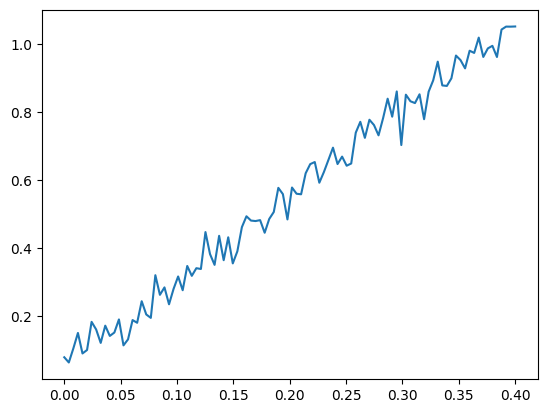

In [86]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data with a linear relationship: y = 2.5x + 1.5 + noise
data_x = np.linspace(0, 10, 100)
true_slope = 2.5
true_intercept = 1.5
noise = np.random.normal(0, 1, 100)  # Add some noise
data_y = true_slope * data_x + true_intercept + noise

data_x = data_x/25
data_y=data_y/25

plt.plot(data_x,data_y)

Meta Learning:
  Slope (m): 1.715679627858246, Intercept (c): 0.21482457896856344, Iterations: 843, Time: 0.018003463745117188

Stochastic:
  Slope (m): 1.7188963438385665, Intercept (c): 0.2100286616644818, Iterations: 799, Time: 0.01700735092163086

Mini-batch:
  Slope (m): 1.7150370894681142, Intercept (c): 0.21386148147333023, Iterations: 848, Time: 0.03922224044799805


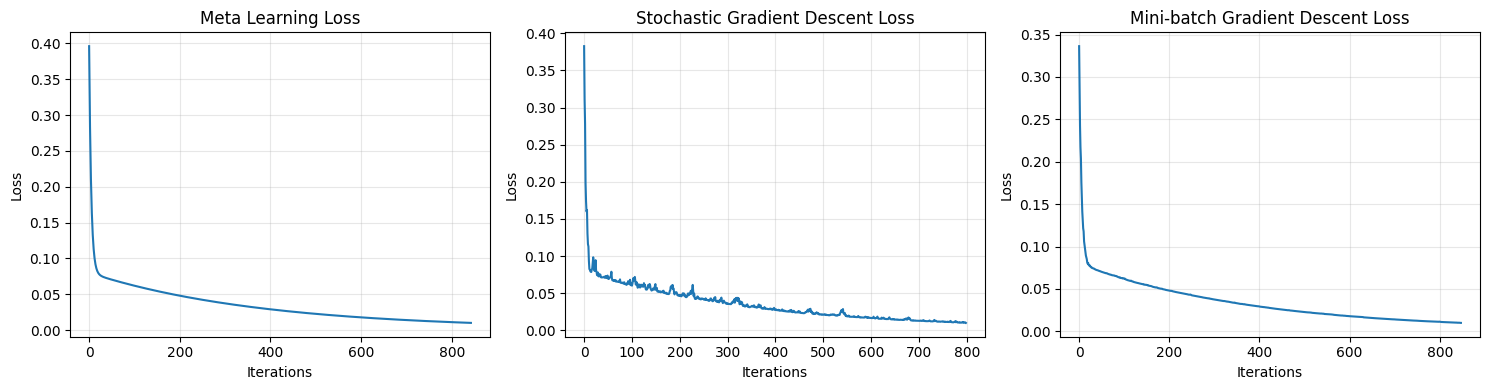

In [87]:
slope_meta, intercept_meta, mc_meta, loss_meta,time_meta = gradient_descent_meta(data_x, data_y)
slope_stoch, intercept_stoch, mc_stoch, loss_stoch,time_stoch = gradient_descent_stoch(data_x, data_y)
slope_mini, intercept_mini, mc_mini, loss_mini,time_mini = gradient_descent_mini(data_x, data_y)

# Print results
print("Meta Learning:")
print(f"  Slope (m): {slope_meta}, Intercept (c): {intercept_meta}, Iterations: {len(loss_meta)}, Time: {time_meta}")
print("\nStochastic:")
print(f"  Slope (m): {slope_stoch}, Intercept (c): {intercept_stoch}, Iterations: {len(loss_stoch)}, Time: {time_stoch}")
print("\nMini-batch:")
print(f"  Slope (m): {slope_mini}, Intercept (c): {intercept_mini}, Iterations: {len(loss_mini)}, Time: {time_mini}")

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Meta Learning Loss
axes[0].plot(loss_meta)
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("Loss")
axes[0].set_title("Meta Learning Loss")
axes[0].grid(True, alpha=0.3)

# Plot 2: Stochastic Loss
axes[1].plot(loss_stoch)
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Loss")
axes[1].set_title("Stochastic Gradient Descent Loss")
axes[1].grid(True, alpha=0.3)

# Plot 3: Mini-batch Loss
axes[2].plot(loss_mini)
axes[2].set_xlabel("Iterations")
axes[2].set_ylabel("Loss")
axes[2].set_title("Mini-batch Gradient Descent Loss")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

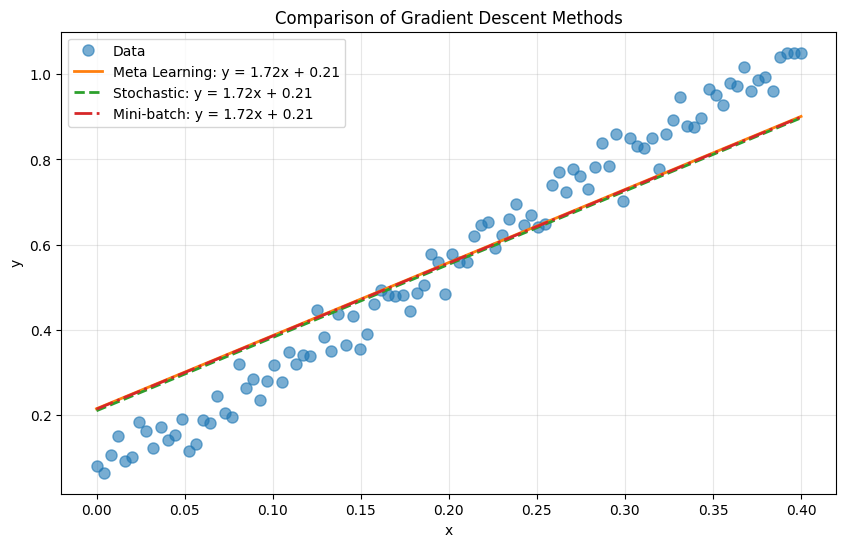

In [88]:
# Plot all predictions on the same plot
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(data_x, data_y, 'o', label='Data', markersize=8, alpha=0.6)

# Plot Meta Learning prediction
y_pred_meta = slope_meta * data_x + intercept_meta
plt.plot(data_x, y_pred_meta, '-', linewidth=2, 
         label=f'Meta Learning: y = {slope_meta:.2f}x + {intercept_meta:.2f}')

# Plot Stochastic prediction
y_pred_stoch = slope_stoch * data_x + intercept_stoch
plt.plot(data_x, y_pred_stoch, '--', linewidth=2,
         label=f'Stochastic: y = {slope_stoch:.2f}x + {intercept_stoch:.2f}')

# Plot Mini-batch prediction
y_pred_mini = slope_mini * data_x + intercept_mini
plt.plot(data_x, y_pred_mini, '-.', linewidth=2,
         label=f'Mini-batch: y = {slope_mini:.2f}x + {intercept_mini:.2f}')

plt.legend(fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Gradient Descent Methods')
plt.grid(True, alpha=0.3)
plt.show()

## Minibatch dataset exploration

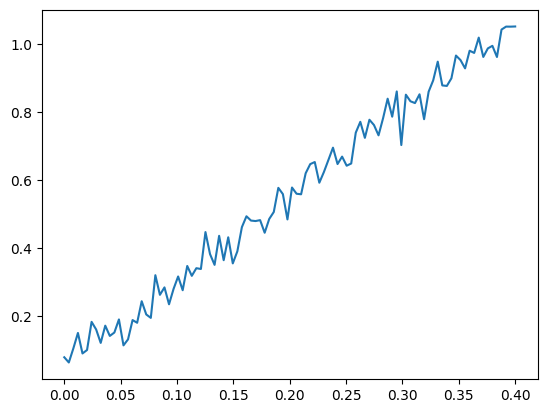

In [89]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data with a linear relationship: y = 2.5x + 1.5 + noise
data_x = np.linspace(0, 10, 100)
true_slope = 2.5
true_intercept = 1.5
noise = np.random.normal(0, 1, 100)  # Add some noise
data_y = true_slope * data_x + true_intercept + noise

data_x = data_x/25
data_y=data_y/25

plt.plot(data_x,data_y)

Meta Learning:
  Slope (m): 1.7146393158814779, Intercept (c): 0.2150353973617719, Iterations: 8425, Time: 0.12634587287902832

Stochastic:
  Slope (m): 1.7146931028577064, Intercept (c): 0.2157832383806123, Iterations: 8455, Time: 0.13796043395996094

Mini-batch:
  Slope (m): 1.7145772399359154, Intercept (c): 0.2153619520438175, Iterations: 8387, Time: 0.3931283950805664


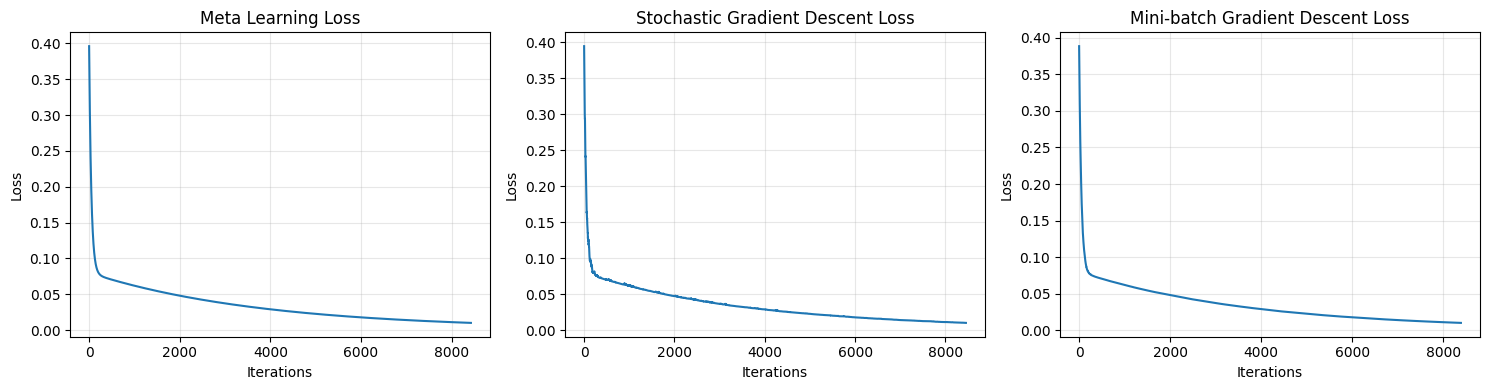

In [90]:
slope_meta, intercept_meta, mc_meta, loss_meta,time_meta = gradient_descent_meta(data_x, data_y,tol = 1e-2,learning_rate = 0.005)
slope_stoch, intercept_stoch, mc_stoch, loss_stoch,time_stoch = gradient_descent_stoch(data_x, data_y,tol = 1e-2,learning_rate = 0.005)
slope_mini, intercept_mini, mc_mini, loss_mini,time_mini = gradient_descent_mini(data_x, data_y,tol = 1e-2,learning_rate = 0.005)

# Print results
print("Meta Learning:")
print(f"  Slope (m): {slope_meta}, Intercept (c): {intercept_meta}, Iterations: {len(loss_meta)}, Time: {time_meta}")
print("\nStochastic:")
print(f"  Slope (m): {slope_stoch}, Intercept (c): {intercept_stoch}, Iterations: {len(loss_stoch)}, Time: {time_stoch}")
print("\nMini-batch:")
print(f"  Slope (m): {slope_mini}, Intercept (c): {intercept_mini}, Iterations: {len(loss_mini)}, Time: {time_mini}")

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Meta Learning Loss
axes[0].plot(loss_meta)
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("Loss")
axes[0].set_title("Meta Learning Loss")
axes[0].grid(True, alpha=0.3)

# Plot 2: Stochastic Loss
axes[1].plot(loss_stoch)
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Loss")
axes[1].set_title("Stochastic Gradient Descent Loss")
axes[1].grid(True, alpha=0.3)

# Plot 3: Mini-batch Loss
axes[2].plot(loss_mini)
axes[2].set_xlabel("Iterations")
axes[2].set_ylabel("Loss")
axes[2].set_title("Mini-batch Gradient Descent Loss")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

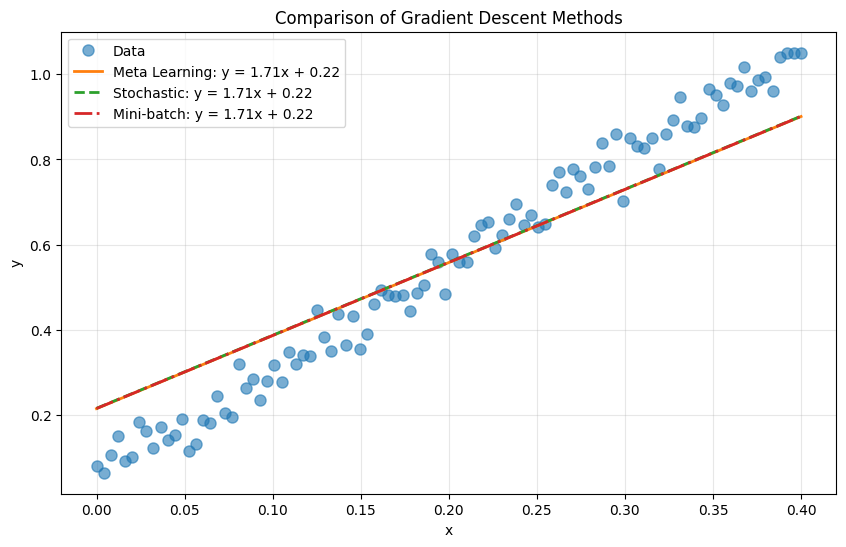

In [91]:
# Plot all predictions on the same plot
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(data_x, data_y, 'o', label='Data', markersize=8, alpha=0.6)

# Plot Meta Learning prediction
y_pred_meta = slope_meta * data_x + intercept_meta
plt.plot(data_x, y_pred_meta, '-', linewidth=2, 
         label=f'Meta Learning: y = {slope_meta:.2f}x + {intercept_meta:.2f}')

# Plot Stochastic prediction
y_pred_stoch = slope_stoch * data_x + intercept_stoch
plt.plot(data_x, y_pred_stoch, '--', linewidth=2,
         label=f'Stochastic: y = {slope_stoch:.2f}x + {intercept_stoch:.2f}')

# Plot Mini-batch prediction
y_pred_mini = slope_mini * data_x + intercept_mini
plt.plot(data_x, y_pred_mini, '-.', linewidth=2,
         label=f'Mini-batch: y = {slope_mini:.2f}x + {intercept_mini:.2f}')

plt.legend(fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Gradient Descent Methods')
plt.grid(True, alpha=0.3)
plt.show()

## Stoch dataset exploration

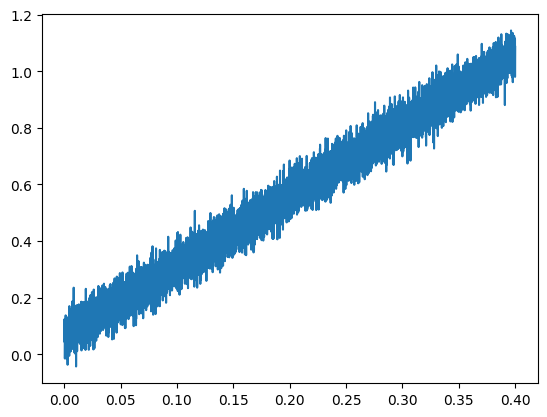

In [92]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data with a linear relationship: y = 2.5x + 1.5 + noise
data_x = np.linspace(0, 10, 10000)
true_slope = 2.5
true_intercept = 1.5
noise = np.random.normal(0, 1, 10000)  # Add some noise
data_y = true_slope * data_x + true_intercept + noise

data_x = data_x/25
data_y=data_y/25

plt.plot(data_x,data_y)

Meta Learning:
  Slope (m): 1.7055687439740475, Intercept (c): 0.2208547212693229, Iterations: 861, Time: 0.10978889465332031

Stochastic:
  Slope (m): 1.7084044932285207, Intercept (c): 0.22428844431553918, Iterations: 845, Time: 0.03193306922912598

Mini-batch:
  Slope (m): 1.70738524401205, Intercept (c): 0.22694683790541903, Iterations: 856, Time: 0.06661272048950195


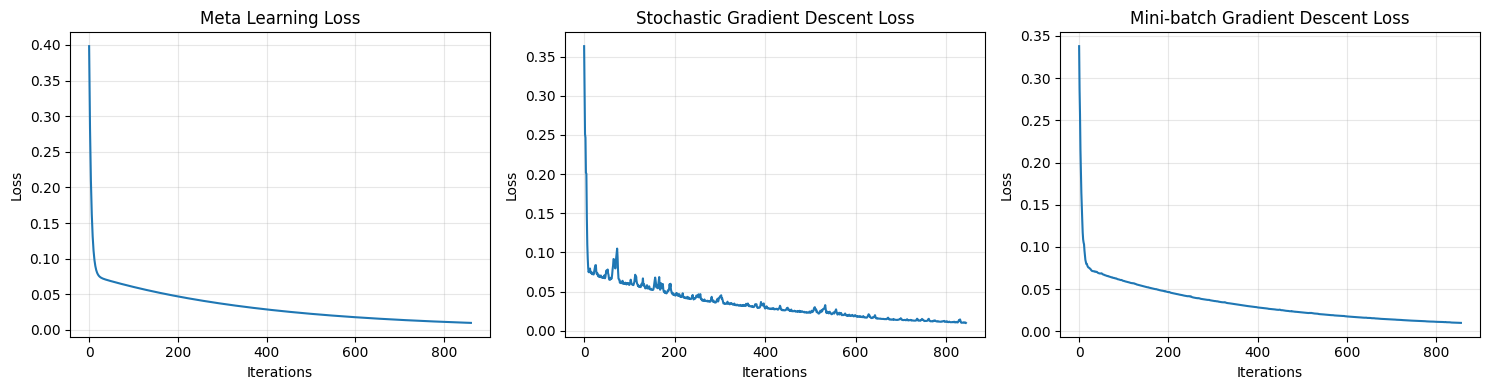

In [93]:
slope_meta, intercept_meta, mc_meta, loss_meta,time_meta = gradient_descent_meta(data_x, data_y)
slope_stoch, intercept_stoch, mc_stoch, loss_stoch,time_stoch = gradient_descent_stoch(data_x, data_y)
slope_mini, intercept_mini, mc_mini, loss_mini,time_mini = gradient_descent_mini(data_x, data_y)

# Print results
print("Meta Learning:")
print(f"  Slope (m): {slope_meta}, Intercept (c): {intercept_meta}, Iterations: {len(loss_meta)}, Time: {time_meta}")
print("\nStochastic:")
print(f"  Slope (m): {slope_stoch}, Intercept (c): {intercept_stoch}, Iterations: {len(loss_stoch)}, Time: {time_stoch}")
print("\nMini-batch:")
print(f"  Slope (m): {slope_mini}, Intercept (c): {intercept_mini}, Iterations: {len(loss_mini)}, Time: {time_mini}")

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Meta Learning Loss
axes[0].plot(loss_meta)
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("Loss")
axes[0].set_title("Meta Learning Loss")
axes[0].grid(True, alpha=0.3)

# Plot 2: Stochastic Loss
axes[1].plot(loss_stoch)
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Loss")
axes[1].set_title("Stochastic Gradient Descent Loss")
axes[1].grid(True, alpha=0.3)

# Plot 3: Mini-batch Loss
axes[2].plot(loss_mini)
axes[2].set_xlabel("Iterations")
axes[2].set_ylabel("Loss")
axes[2].set_title("Mini-batch Gradient Descent Loss")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

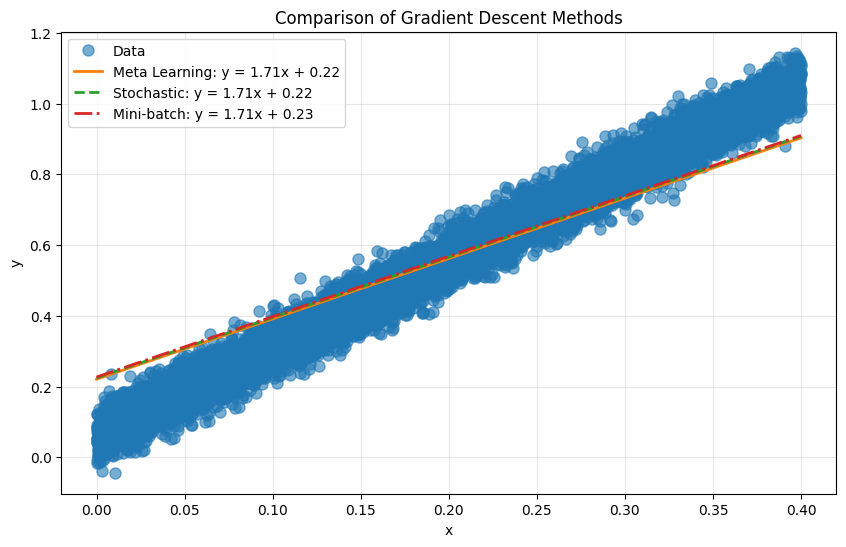

In [94]:
# Plot all predictions on the same plot
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(data_x, data_y, 'o', label='Data', markersize=8, alpha=0.6)

# Plot Meta Learning prediction
y_pred_meta = slope_meta * data_x + intercept_meta
plt.plot(data_x, y_pred_meta, '-', linewidth=2, 
         label=f'Meta Learning: y = {slope_meta:.2f}x + {intercept_meta:.2f}')

# Plot Stochastic prediction
y_pred_stoch = slope_stoch * data_x + intercept_stoch
plt.plot(data_x, y_pred_stoch, '--', linewidth=2,
         label=f'Stochastic: y = {slope_stoch:.2f}x + {intercept_stoch:.2f}')

# Plot Mini-batch prediction
y_pred_mini = slope_mini * data_x + intercept_mini
plt.plot(data_x, y_pred_mini, '-.', linewidth=2,
         label=f'Mini-batch: y = {slope_mini:.2f}x + {intercept_mini:.2f}')

plt.legend(fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Gradient Descent Methods')
plt.grid(True, alpha=0.3)
plt.show()

## CNN example with handwritten dataset (MNIST)

In [4]:
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())

df_test = pd.read_csv('test.csv')
print(df_test.head())
print(df_test.info())

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# Split data and convert it to numpy array to be able to rescale it
X = df.drop('label', axis=1).values
y = df['label'].values

#change to numpy array for test set
X_test = df_test.values

In [ ]:
# Normalize pixel values

# for training set
X = X / 255

#for test set
X_test = X_test / 255

# Reshape for CNN: (samples, height, width, channels)
# 784 pixels = 28x28 image, 1 channel for grayscale
X = X.reshape(-1, 28, 28, 1)

# for test set
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=10)

In [ ]:
# Split data for a train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Conv2D 32 means theres are 32 kernals with different weights 'scanning through' the image
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.25))
# dropout happens between 2 layers cause we want to drop neurons to prevent over-fitting
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
# take either the highest or average of of 2x2 pixels to reduce the size of the image.
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
#flatten output into a 1 dimensional vector for results to be interpretted
cnn_model.add(Dense(64, activation='relu'))
#adding a dense, fully connected layer. basically changing it to
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))  # 10 classes

# Compile CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Reshape data for LSTM model: (samples, timesteps, features)
X_train_lstm = X_train.reshape(-1, 28, 28)
X_val_lstm = X_val.reshape(-1, 28, 28)
X_test_lstm = X_test.reshape(-1, 28, 28)

# Define LSTM-only model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(28, 28), return_sequences=True))
lstm_model.add(Dropout(0.25))

lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(10, activation='softmax'))  # 10 classes

# Compile LSTM model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #can change loss to sparse_...

# Train LSTM model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))

# Define combined CNN-LSTM model
combined_model = Sequential()

# CNN layers for feature extraction
combined_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
combined_model.add(MaxPooling2D((2, 2)))
combined_model.add(Dropout(0.25))

combined_model.add(Conv2D(64, (3, 3), activation='relu'))
combined_model.add(MaxPooling2D((2, 2)))
combined_model.add(Dropout(0.25))

# Flatten and wrap in TimeDistributed for LSTM
combined_model.add(TimeDistributed(Flatten()))

# LSTM layers for temporal learning
combined_model.add(LSTM(64))
combined_model.add(Dropout(0.5))

# Fully connected output layer
combined_model.add(Dense(10, activation='softmax'))  # 10 classes

# Compile combined model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train combined model
combined_history = combined_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
# epoch means going through the ENTIRE training set once
# batch size is how many batches the whole trainng data is split into. one batch undergoes 1 foreward and 1 backward pass.

In [ ]:
X.shape